In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
#Membaca file (5 data teratas)
wine = pd.read_csv('wine.csv')
wine.head()

customer_seg  Alcohol  Malic acid   Ash   Alcalinity of ash   Magnesium  \
0             1    14.23        1.71  2.43                15.6         127   
1             1    13.20        1.78  2.14                11.2         100   
2             1    13.16        2.36  2.67                18.6         101   
3             1    14.37        1.95  2.50                16.8         113   
4             1    13.24        2.59  2.87                21.0         118   

   Total phenols   Flavanoids   Nonflavanoid phenols   Proanthocyanins  \
0           2.80         3.06                   0.28              2.29   
1           2.65         2.76                   0.26              1.28   
2           2.80         3.24                   0.30              2.81   
3           3.85         3.49                   0.24              2.18   
4           2.80         2.69                   0.39              1.82   

    Color intensity   Hue   OD280/OD315 of diluted wines   Proline   
0              5.64  1.04                           3.92       1065  
1              4.38  1.05                           3.40       1050  
2              5.68  1.03                           3.17       1185  
3              7.80  0.86                           3.45       1480  
4              4.32  1.04                           2.93        735

In [3]:
#Membaca file (5 data terbawah)
wine.tail()

customer_seg  Alcohol  Malic acid   Ash   Alcalinity of ash   Magnesium  \
173             3    13.71        5.65  2.45                20.5          95   
174             3    13.40        3.91  2.48                23.0         102   
175             3    13.27        4.28  2.26                20.0         120   
176             3    13.17        2.59  2.37                20.0         120   
177             3    14.13        4.10  2.74                24.5          96   

     Total phenols   Flavanoids   Nonflavanoid phenols   Proanthocyanins  \
173           1.68         0.61                   0.52              1.06   
174           1.80         0.75                   0.43              1.41   
175           1.59         0.69                   0.43              1.35   
176           1.65         0.68                   0.53              1.46   
177           2.05         0.76                   0.56              1.35   

      Color intensity   Hue   OD280/OD315 of diluted wines   Proline   
173               7.7  0.64                           1.74        740  
174               7.3  0.70                           1.56        750  
175              10.2  0.59                           1.56        835  
176               9.3  0.60                           1.62        840  
177               9.2  0.61                           1.60        560

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_seg                   178 non-null    int64  
 1   Alcohol                        178 non-null    float64
 2   Malic acid                     178 non-null    float64
 3   Ash                            178 non-null    float64
 4    Alcalinity of ash             178 non-null    float64
 5    Magnesium                     178 non-null    int64  
 6   Total phenols                  178 non-null    float64
 7    Flavanoids                    178 non-null    float64
 8    Nonflavanoid phenols          178 non-null    float64
 9    Proanthocyanins               178 non-null    float64
 10   Color intensity               178 non-null    float64
 11   Hue                           178 non-null    float64
 12   OD280/OD315 of diluted wines  178 non-null    flo

In [5]:
#Exploratory Data Analysis (EDA)
#Melihat ringkasan statistik sederhana dataset
wine.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

customer_seg     Alcohol  Malic acid         Ash   Alcalinity of ash  \
count    178.000000  178.000000  178.000000  178.000000          178.000000   
mean       1.938202   13.000618    2.336348    2.366517           19.494944   
std        0.775035    0.811827    1.117146    0.274344            3.339564   
min        1.000000   11.030000    0.740000    1.360000           10.600000   
10%        1.000000   11.933000    1.247000    2.000000           16.000000   
25%        1.000000   12.362500    1.602500    2.210000           17.200000   
50%        2.000000   13.050000    1.865000    2.360000           19.500000   
75%        3.000000   13.677500    3.082500    2.557500           21.500000   
90%        3.000000   14.100000    3.983000    2.700000           24.000000   
max        3.000000   14.830000    5.800000    3.230000           30.000000   

        Magnesium  Total phenols   Flavanoids   Nonflavanoid phenols  \
count  178.000000     178.000000   178.000000             178.000000   
mean    99.741573       2.295112     2.029270               0.361854   
std     14.282484       0.625851     0.998859               0.124453   
min     70.000000       0.980000     0.340000               0.130000   
10%     85.000000       1.471000     0.607000               0.217000   
25%     88.000000       1.742500     1.205000               0.270000   
50%     98.000000       2.355000     2.135000               0.340000   
75%    107.000000       2.800000     2.875000               0.437500   
90%    118.000000       3.044000     3.233000               0.530000   
max    162.000000       3.880000     5.080000               0.660000   

        Proanthocyanins   Color intensity         Hue  \
count        178.000000        178.000000  178.000000   
mean           1.590899          5.058090    0.957449   
std            0.572359          2.318286    0.228572   
min            0.410000          1.280000    0.480000   
10%            0.854000          2.549000    0.610000   
25%            1.250000          3.220000    0.782500   
50%            1.555000          4.690000    0.965000   
75%            1.950000          6.200000    1.120000   
90%            2.305000          8.530000    1.233000   
max            3.580000         13.000000    1.710000   

        OD280/OD315 of diluted wines     Proline   
count                     178.000000   178.000000  
mean                        2.611685   746.893258  
std                         0.709990   314.907474  
min                         1.270000   278.000000  
10%                         1.580000   406.700000  
25%                         1.937500   500.500000  
50%                         2.780000   673.500000  
75%                         3.170000   985.000000  
90%                         3.456000  1261.500000  
max                         4.000000  1680.000000

In [6]:
wine.shape
#dataset punya 178 baris and 14 kolom

(178, 14)

<AxesSubplot:>

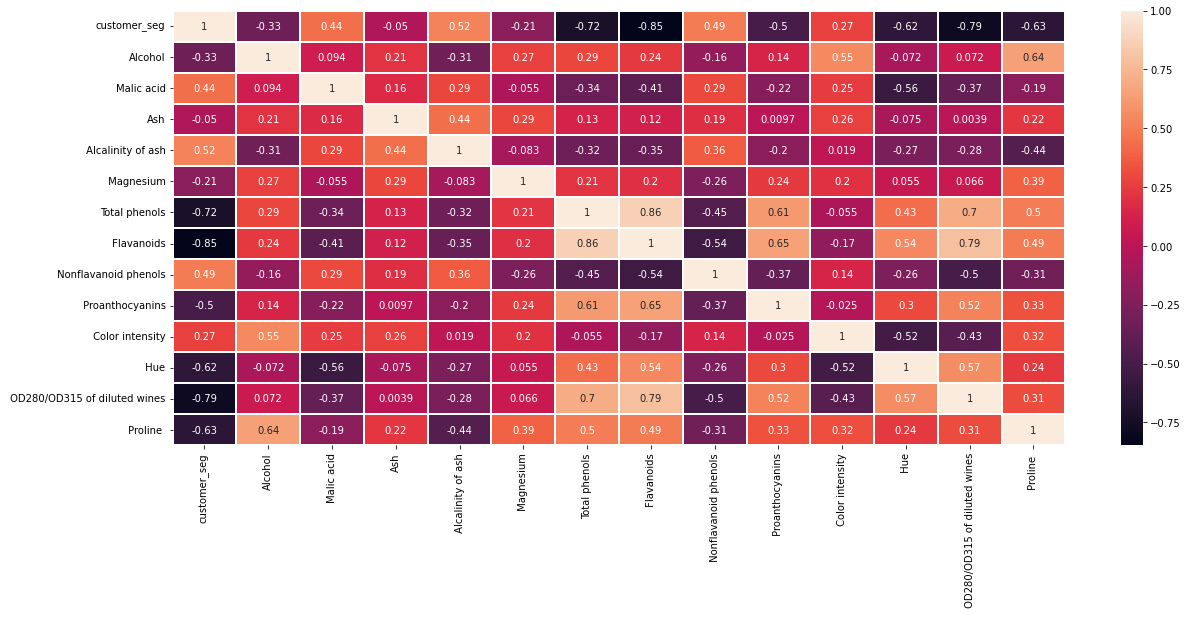

In [7]:
#Data Visualization: Korelasi antar-variabel
plt.figure(figsize=(20,8))
sns.heatmap(wine.corr(), annot=True, linewidths=2)

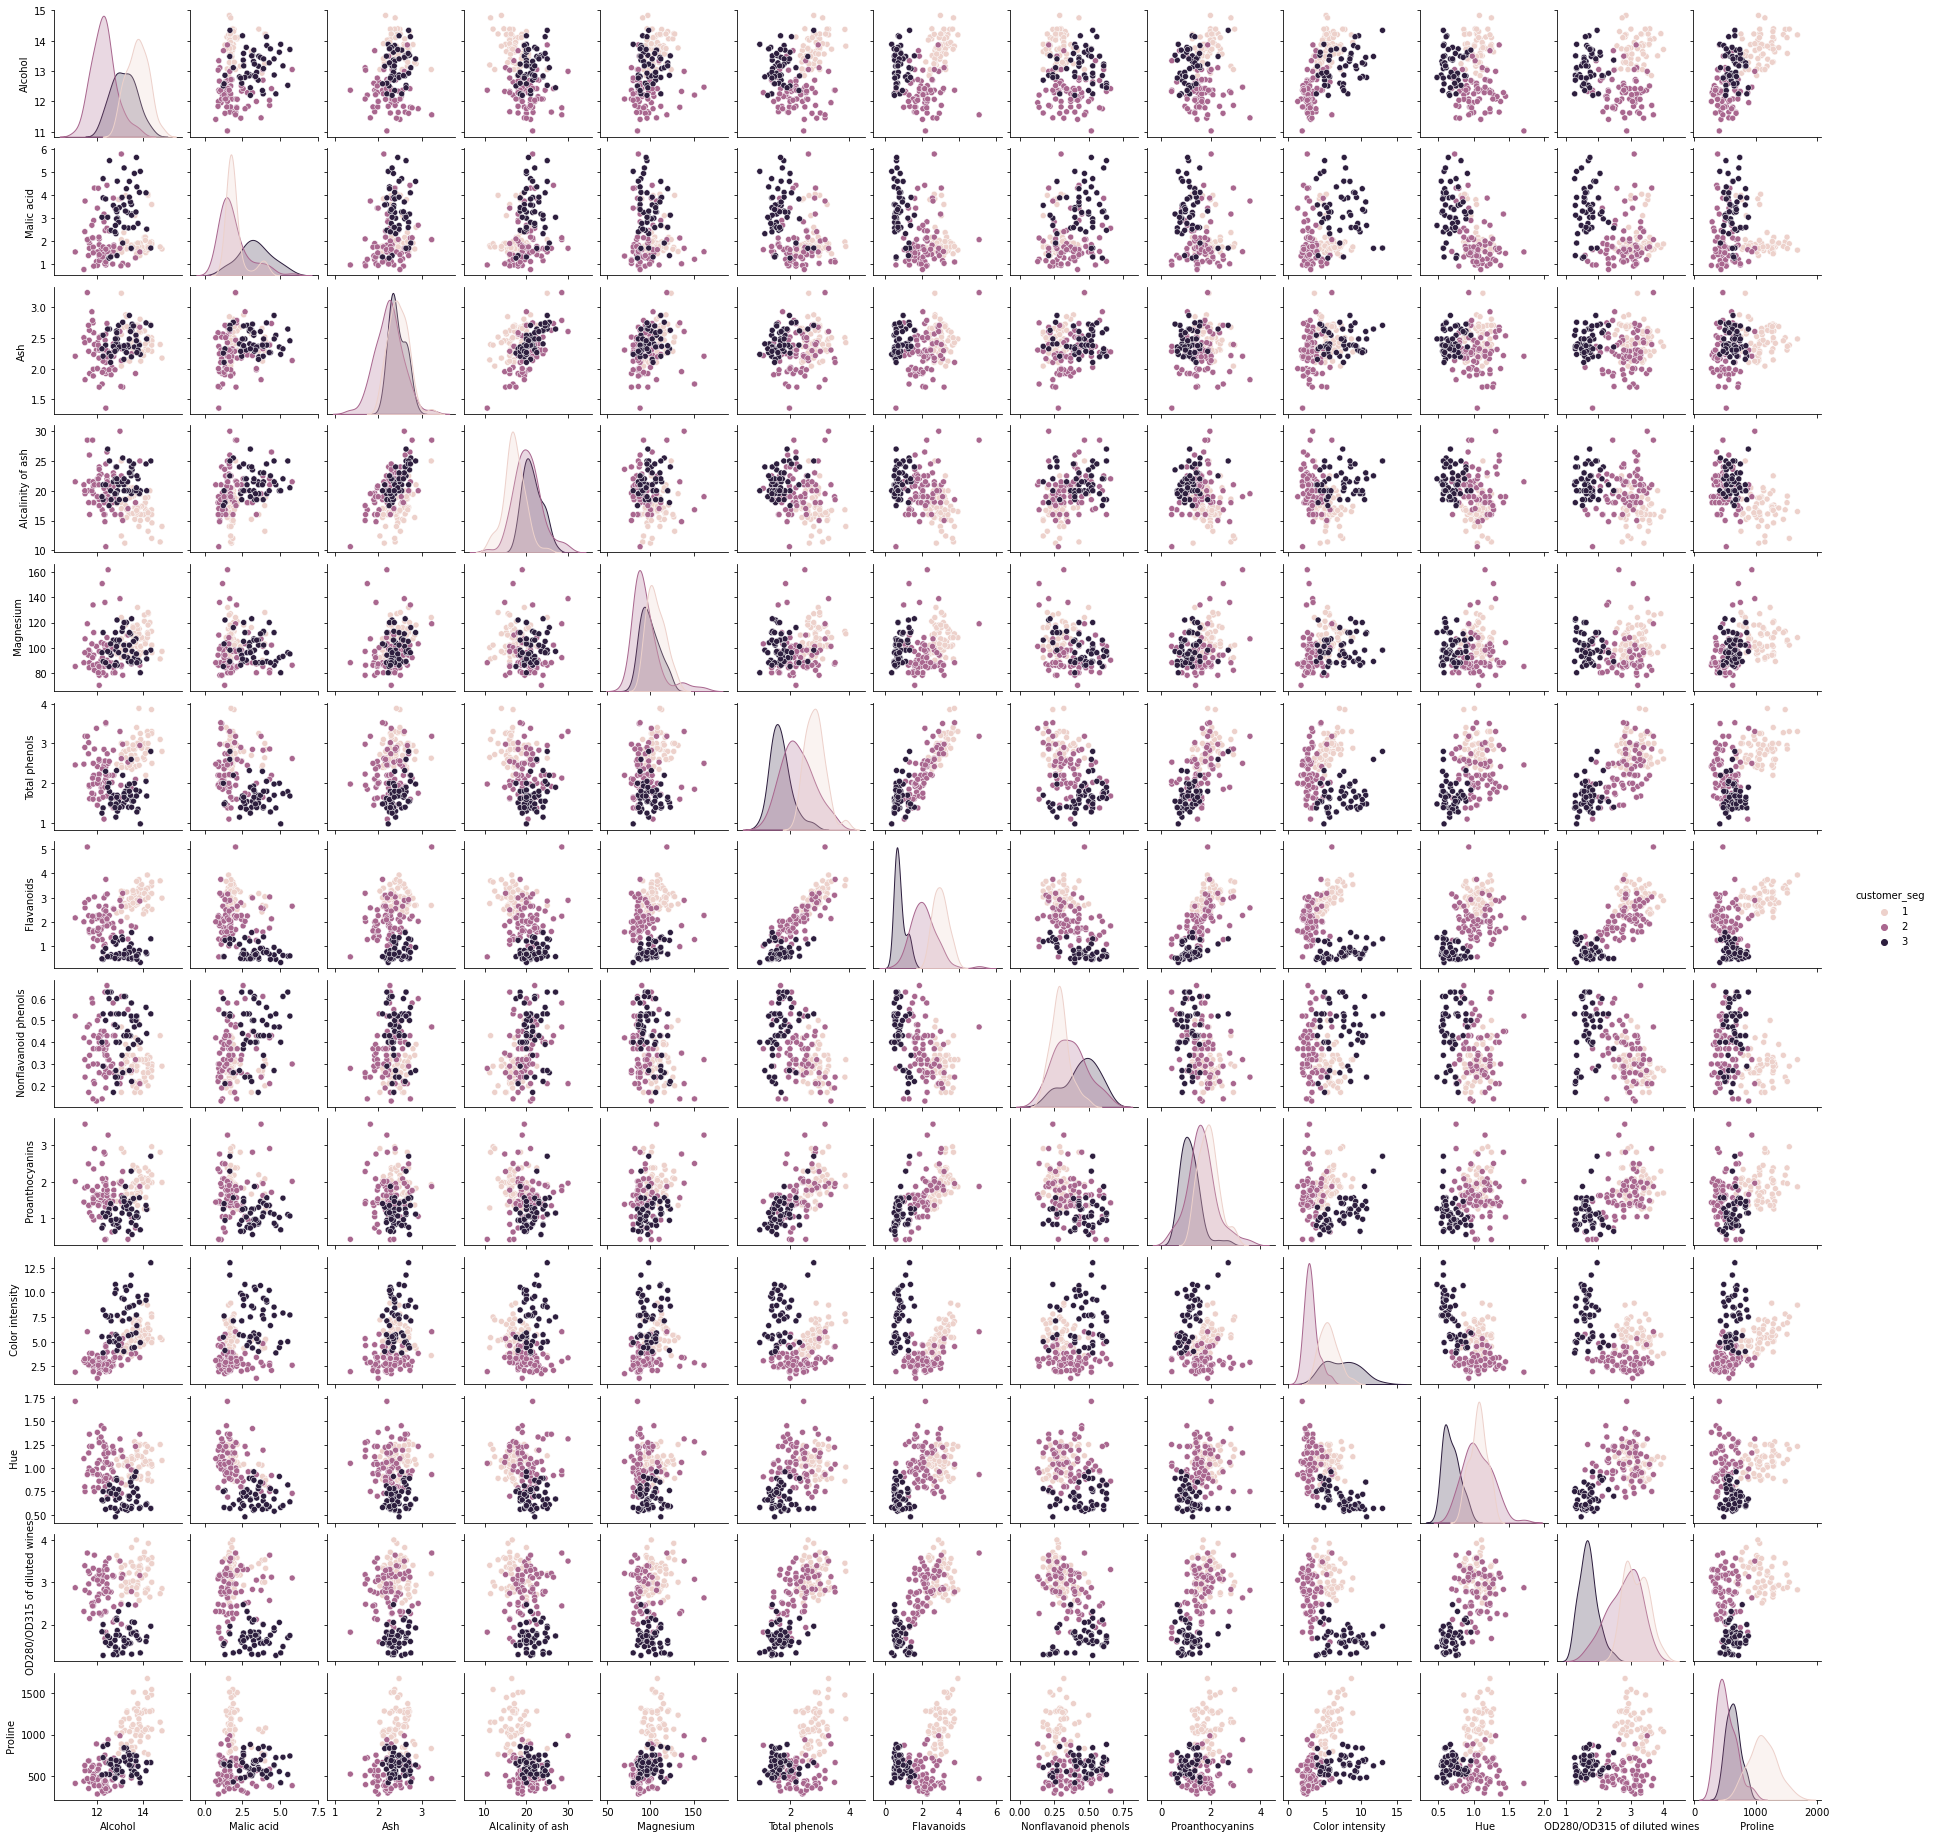

In [8]:
#Data Visualization: Pairplot
sns.pairplot(wine, hue='customer_seg', height=2)

In [9]:
X = wine.iloc[:, 1:13].values
y = wine.iloc[:, 0].values

In [10]:
#Preprocessing: Normalization
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit_transform(X)

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.37201365, 0.45528455,
        0.97069597],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.26450512, 0.46341463,
        0.78021978],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.37542662, 0.44715447,
        0.6959707 ],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.76109215, 0.08943089,
        0.10622711],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.68430034, 0.09756098,
        0.12820513],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.67576792, 0.10569106,
        0.12087912]])

In [13]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [14]:
print('Shape of X training set {}'.format(X_train.shape),
     '&', 'Size of Y training set {}'.format(y_train.shape))

Shape of X training set (124, 12) & Size of Y training set (124,)


In [15]:
#Preprocessing: Checking missing value
print("Missing value for each feature: ")
print(wine.isnull().sum())
print("\nTotal missing value: ")
print(wine.isnull().sum().sum())

Missing value for each feature: 
customer_seg                     0
Alcohol                          0
Malic acid                       0
Ash                              0
 Alcalinity of ash               0
 Magnesium                       0
Total phenols                    0
 Flavanoids                      0
 Nonflavanoid phenols            0
 Proanthocyanins                 0
 Color intensity                 0
 Hue                             0
 OD280/OD315 of diluted wines    0
 Proline                         0
dtype: int64

Total missing value: 
0


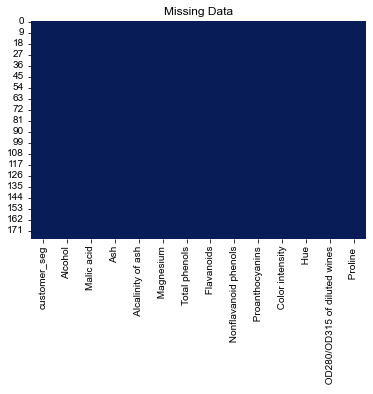

In [16]:
#Visualisasi Missing Value
sns.heatmap(wine.isnull(), cbar = False, cmap="YlGnBu_r")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

In [17]:
#Preprocessing: Checking Outliers
l = list(wine.columns)
l[0:len(l)-2]

['customer_seg',
 'Alcohol',
 'Malic acid',
 'Ash',
 ' Alcalinity of ash',
 ' Magnesium',
 'Total phenols',
 ' Flavanoids',
 ' Nonflavanoid phenols',
 ' Proanthocyanins',
 ' Color intensity',
 ' Hue']

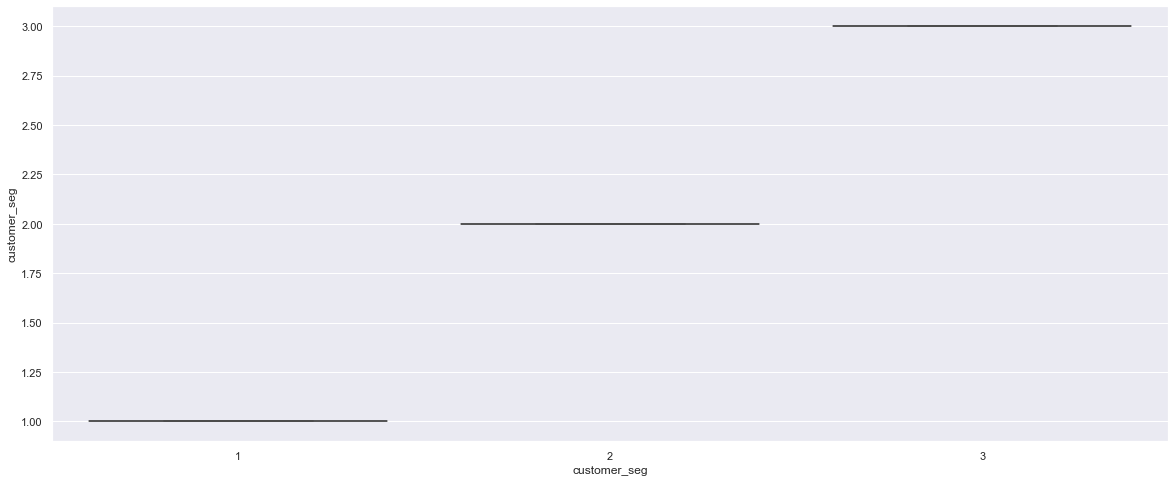

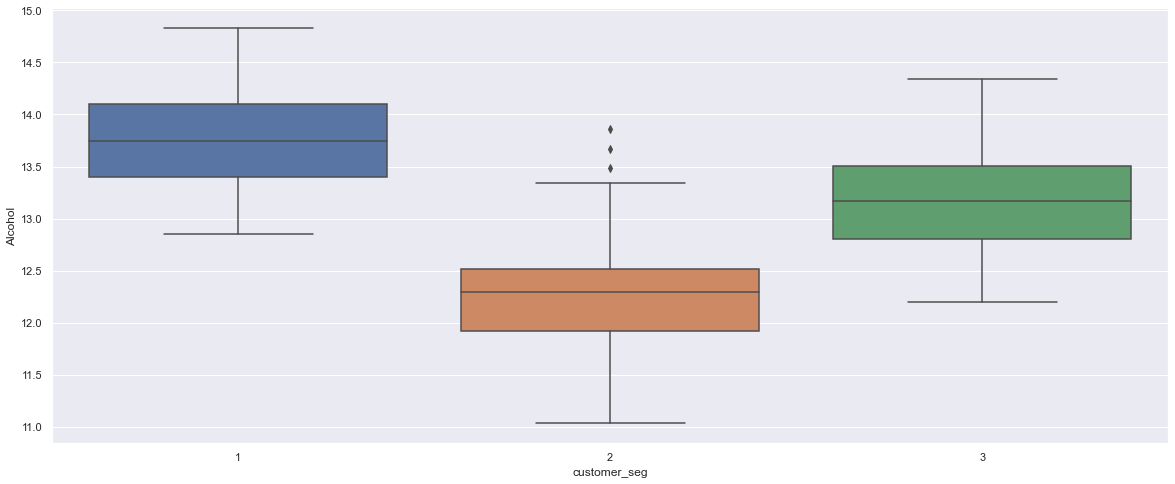

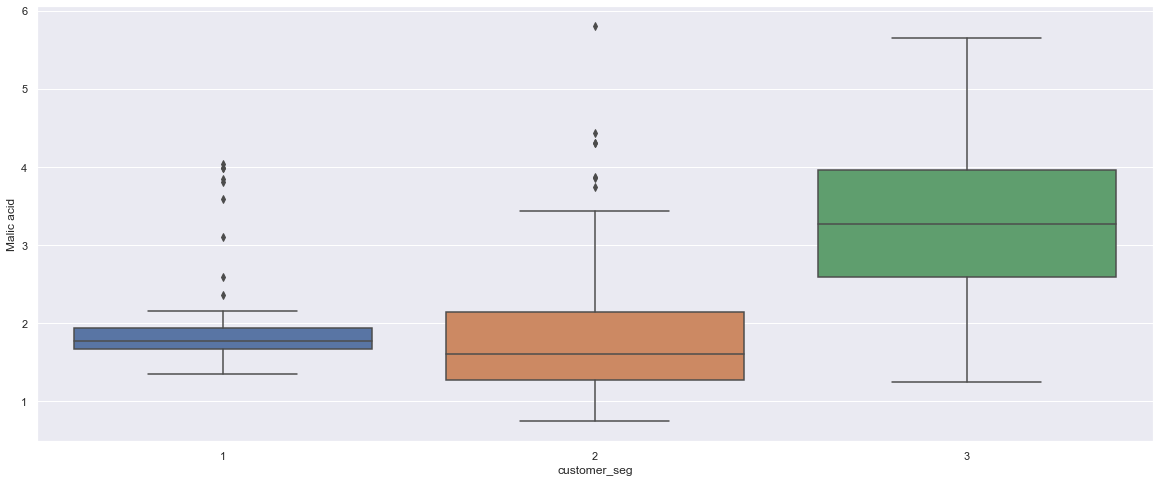

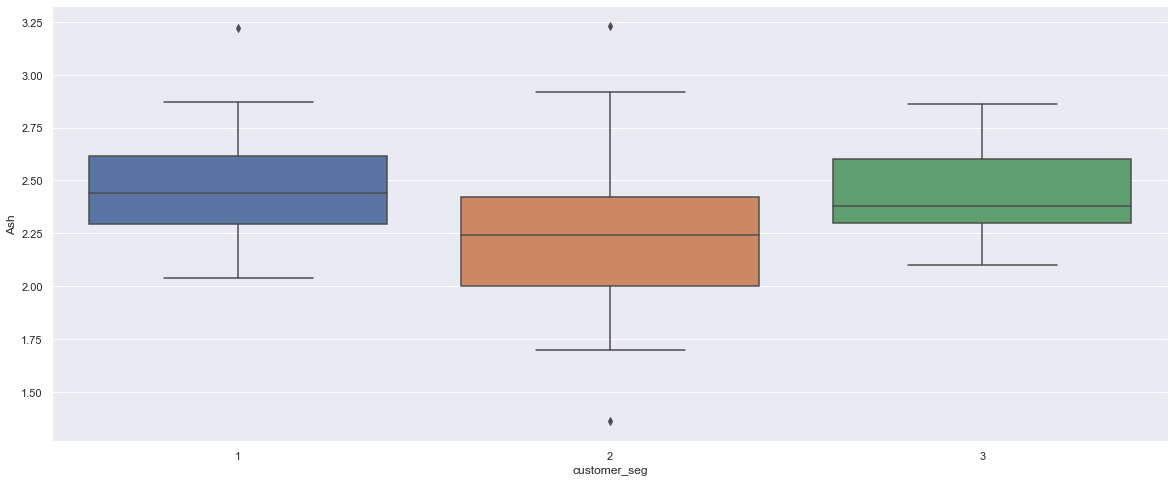

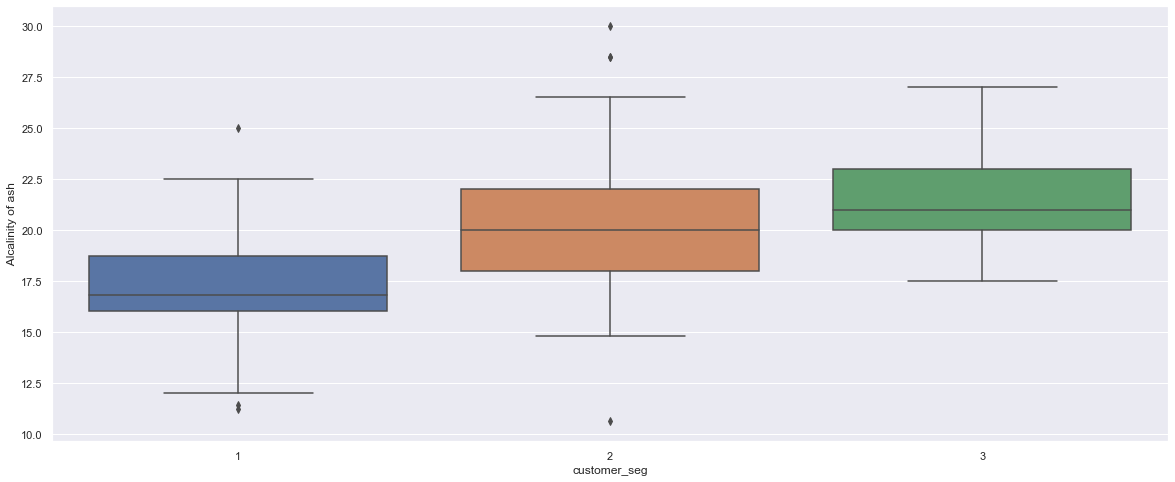

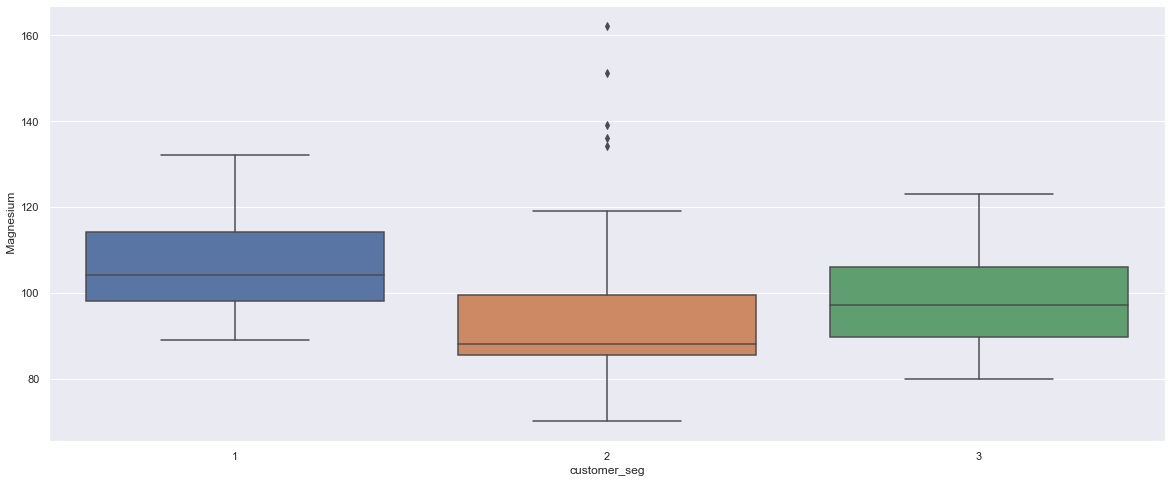

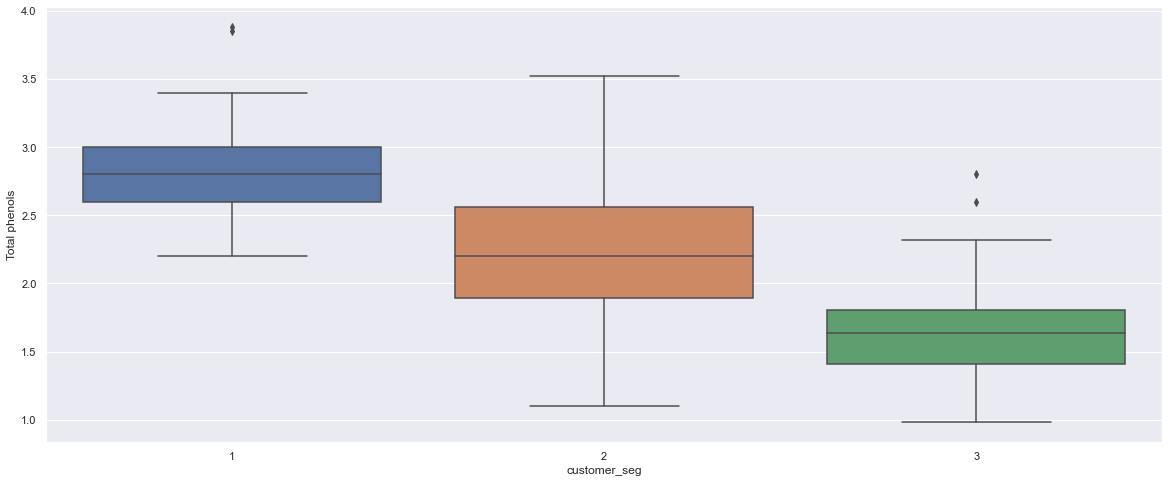

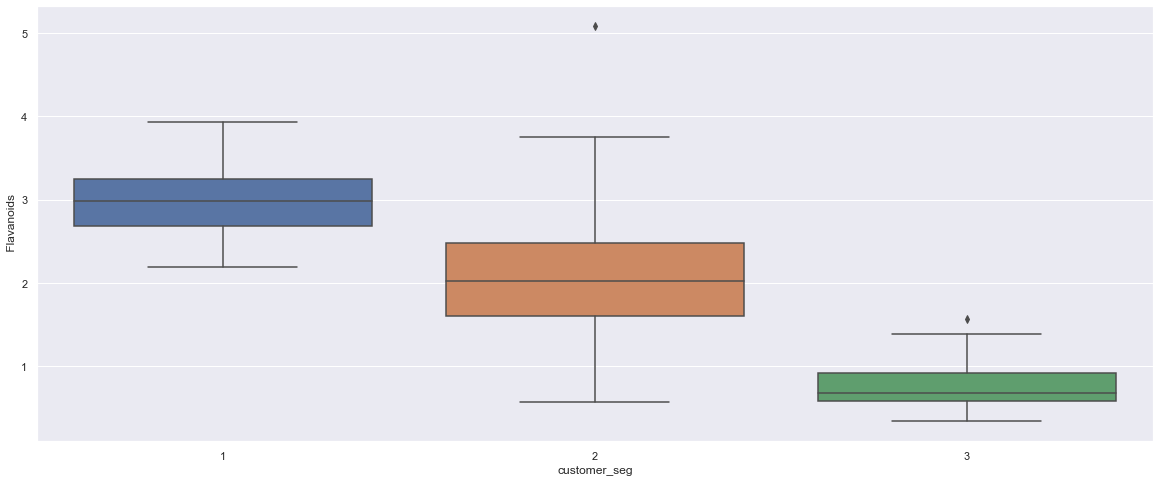

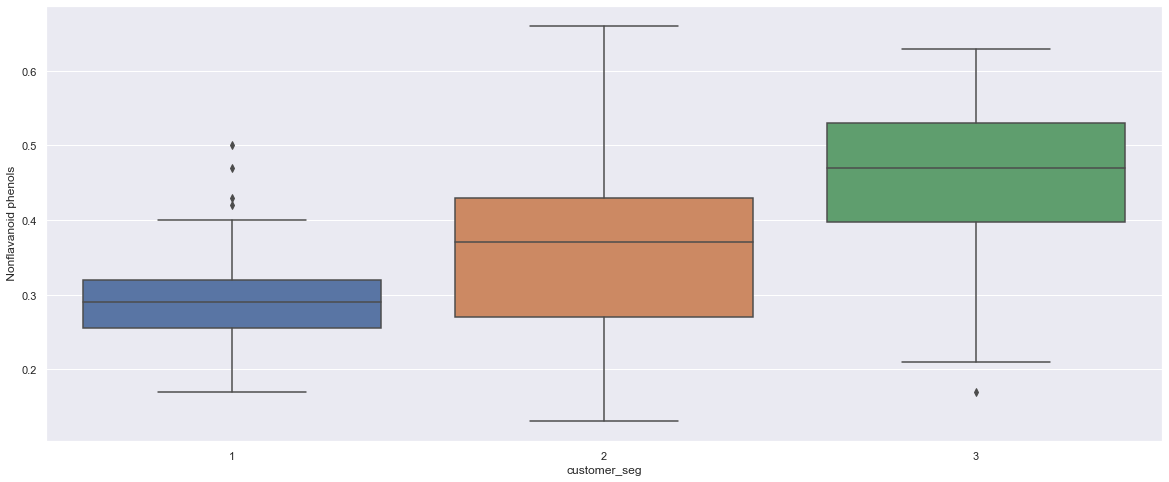

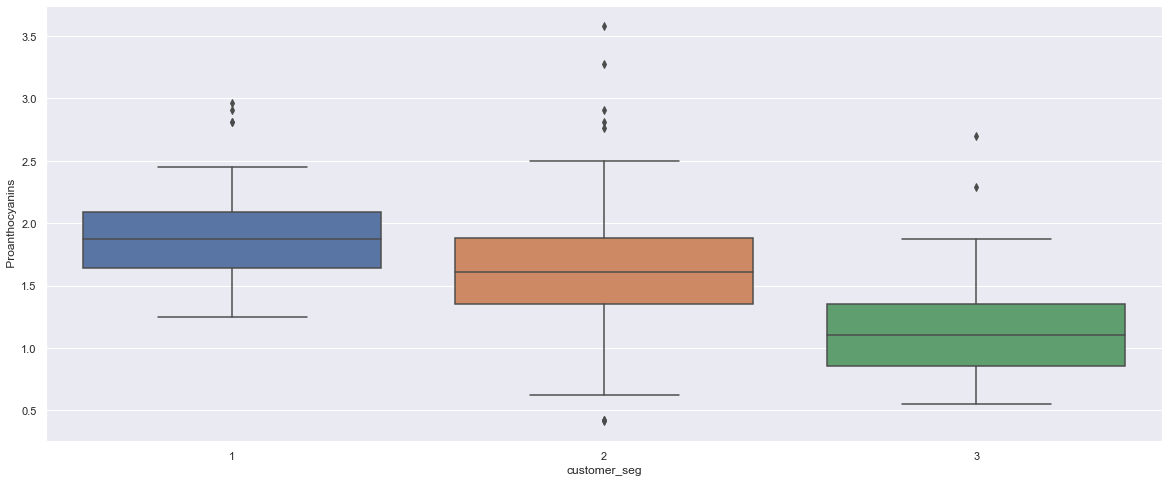

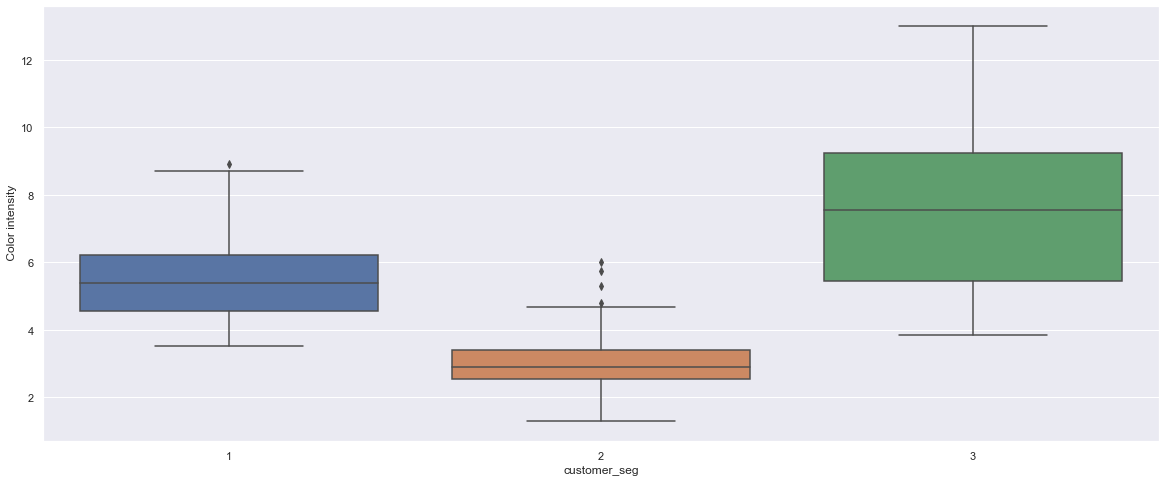

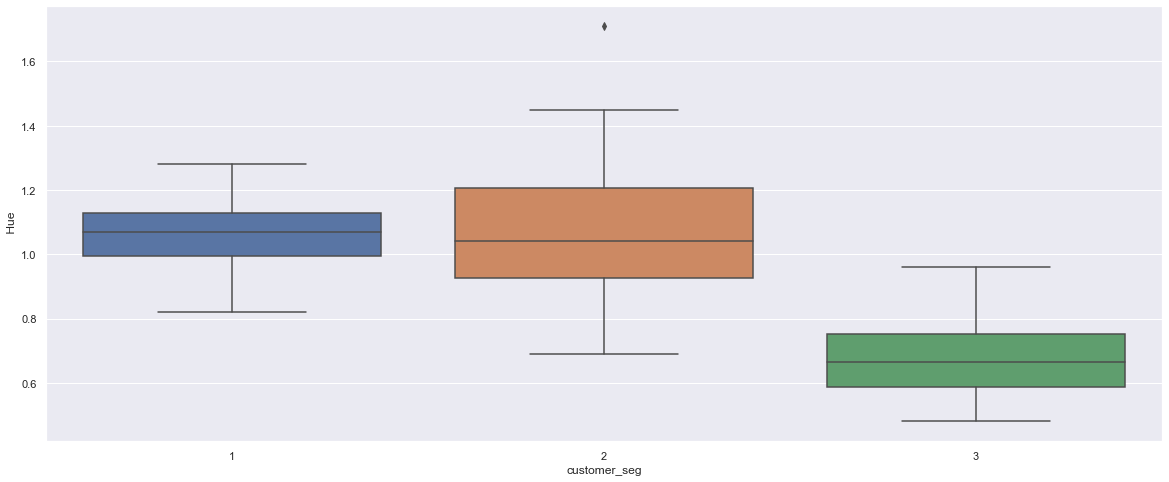

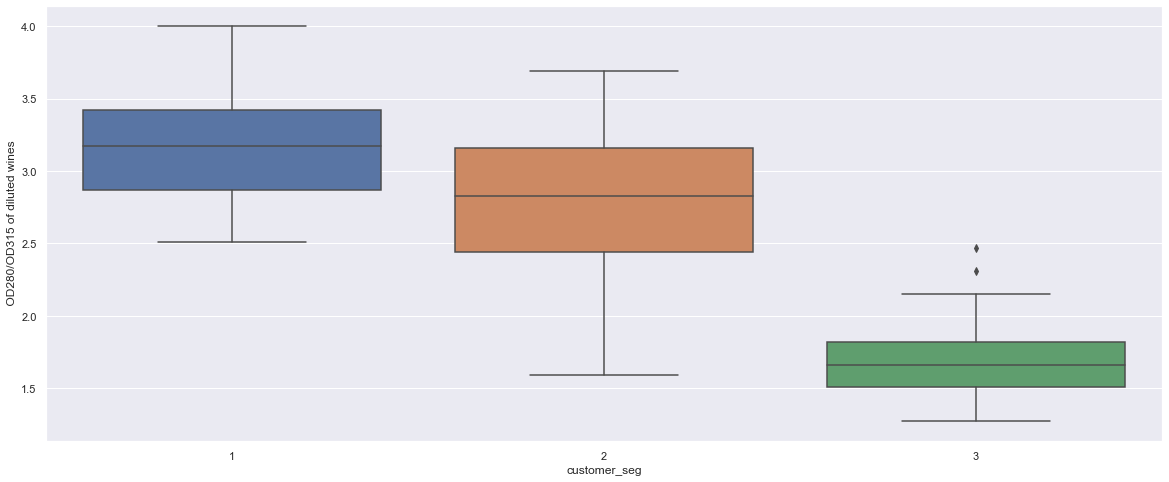

<Figure size 1440x576 with 0 Axes>

In [18]:
for i in range(len(l) - 1):
    sns.boxplot(x="customer_seg", y = l[i], data = wine)
    plt.figure()

In [19]:
#Preprocessing: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit(wine.drop('customer_seg', axis = 1))
scaled_features = scaler.transform(wine.drop('customer_seg', axis = 1))

In [21]:
wine_feat = pd.DataFrame(scaled_features, columns = wine.columns[1:])
wine_feat.head()

Alcohol  Malic acid       Ash   Alcalinity of ash   Magnesium  \
0  1.518613   -0.562250  0.232053           -1.169593    1.913905   
1  0.246290   -0.499413 -0.827996           -2.490847    0.018145   
2  0.196879    0.021231  1.109334           -0.268738    0.088358   
3  1.691550   -0.346811  0.487926           -0.809251    0.930918   
4  0.295700    0.227694  1.840403            0.451946    1.281985   

   Total phenols   Flavanoids   Nonflavanoid phenols   Proanthocyanins  \
0       0.808997     1.034819              -0.659563          1.224884   
1       0.568648     0.733629              -0.820719         -0.544721   
2       0.808997     1.215533              -0.498407          2.135968   
3       2.491446     1.466525              -0.981875          1.032155   
4       0.808997     0.663351               0.226796          0.401404   

    Color intensity       Hue   OD280/OD315 of diluted wines   Proline   
0          0.251717  0.362177                       1.847920   1.013009  
1         -0.293321  0.406051                       1.113449   0.965242  
2          0.269020  0.318304                       0.788587   1.395148  
3          1.186068 -0.427544                       1.184071   2.334574  
4         -0.319276  0.362177                       0.449601  -0.037874

In [22]:
from sklearn.model_selection import train_test_split
X = wine_feat
y = wine['customer_seg']
X_train, X_test, y_train, y_test = train_test_split(scaled_features, wine['customer_seg'], test_size = 0.30, random_state = 0)

In [23]:
#Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#Prediksi hasil data testing
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.91      0.95        22
           3       1.00      1.00      1.00        13

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54

[[19  0  0]
 [ 2 20  0]
 [ 0  0 13]]


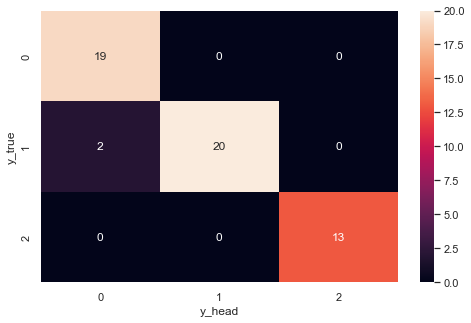

In [26]:
#Confusion Matrix dalam Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [27]:
#Error Rate KNN
knn_error = round(np.mean(y_pred != y_test), 3)
print(f"Misclassification error rate:", knn_error)

Misclassification error rate: 0.037


In [28]:
#Kalkulasi keakuratan data training dan data testing pada Algoritma KNN
knn_train_acc = accuracy_score(y_train, classifier.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

Training accuracy of KNN is : 0.9596774193548387
Test accuracy of KNN is : 0.9629629629629629


In [29]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

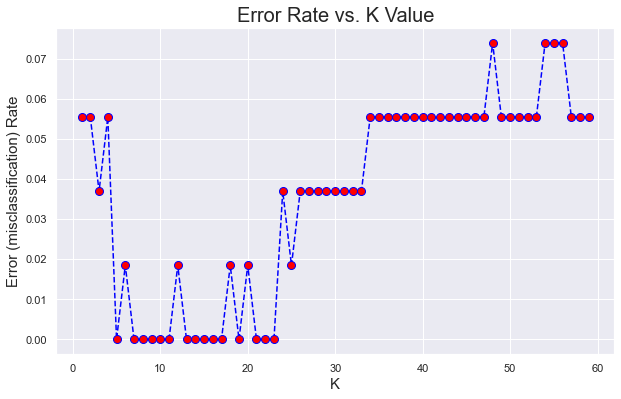

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 60), error_rate, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize = 8)
plt.title("Error Rate vs. K Value", fontsize = 20)
plt.xlabel("K", fontsize = 15)
plt.ylabel("Error (misclassification) Rate", fontsize = 15)

In [31]:
#Algoritma Decision Tree
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
wineTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
wineTree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
wineTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
predTree = wineTree.predict(X_testset)

In [36]:
print(predTree [0:5])
print(y_testset [0:5])

[1 1 1 2 3]
40     1
53     1
34     1
109    2
159    3
Name: customer_seg, dtype: int64


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_testset, predTree))
print(confusion_matrix(y_testset, predTree))

              precision    recall  f1-score   support

           1       0.95      0.78      0.86        23
           2       0.74      0.89      0.81        19
           3       0.92      0.92      0.92        12

    accuracy                           0.85        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.87      0.85      0.85        54

[[18  5  0]
 [ 1 17  1]
 [ 0  1 11]]


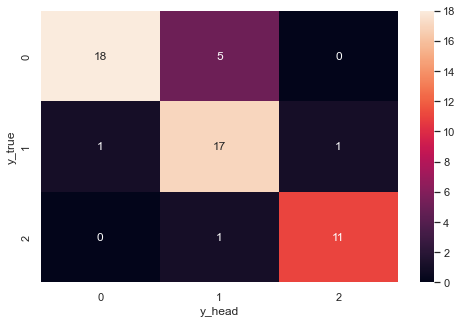

In [38]:
#Confusion Matrix dalam Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_testset, predTree), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [39]:
#Evaluation of Decision Tree
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.8518518518518519


In [40]:
import sklearn.tree as tree

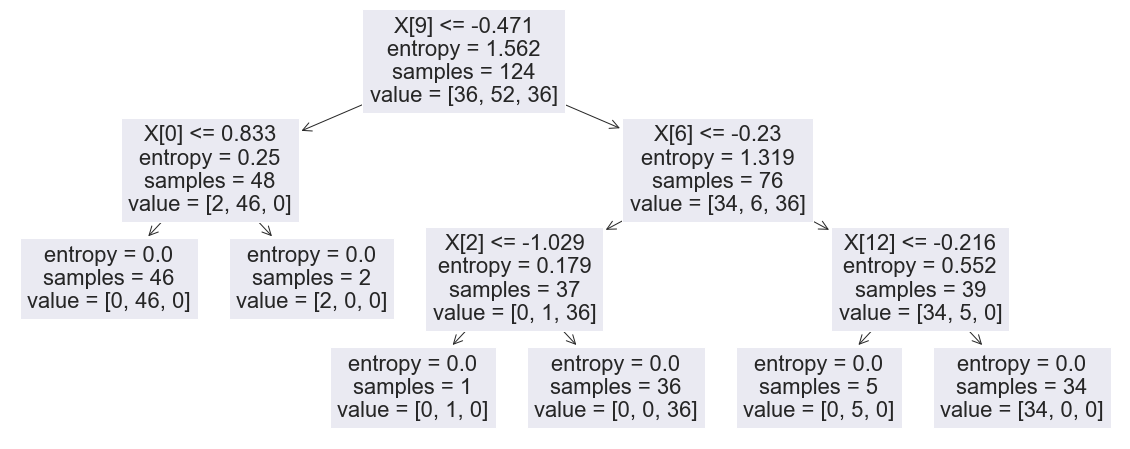

<Figure size 2160x2160 with 0 Axes>

In [41]:
tree.plot_tree(wineTree)
plt.figure(figsize = (30,30))
plt.show()

In [42]:
#Error Rate Decision Tree
decision_error = round(np.mean(predTree != y_testset), 3)
print(f"Misclassification error rate:", {decision_error})

Misclassification error rate: {0.148}


In [43]:
#Kalkulasi keakuratan data training dan data testing pada Algoritma Decision Tree
dtc_train_acc = accuracy_score(y_trainset, wineTree.predict(X_trainset))
dtc_test_acc = accuracy_score(y_testset, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.4074074074074074


In [44]:
error_rate = []

for i in range(1, 60):
    
    wineTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
    wineTree.fit(X_trainset, y_trainset)
    y_pred_i = wineTree.predict(X_testset)
    error_rate.append(np.mean(predTree != y_testset))

Text(0, 0.5, 'Error (misclassification) Rate')

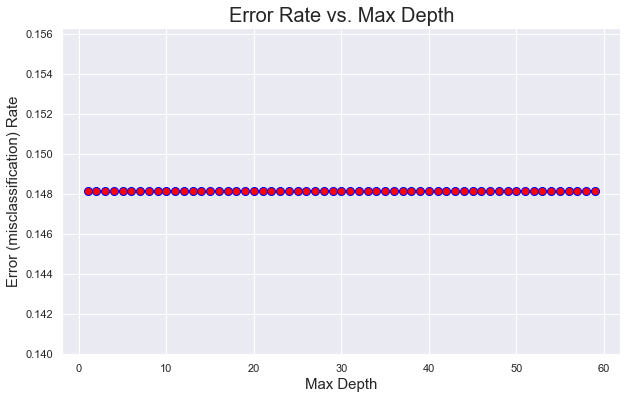

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 60), error_rate, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize = 8)
plt.title("Error Rate vs. Max Depth", fontsize = 20)
plt.xlabel("Max Depth", fontsize = 15)
plt.ylabel("Error (misclassification) Rate", fontsize = 15)

In [46]:
#Perbandingan tingkat kesalahan antara KNN dan Decision Tree
models = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree'],
    'Score' : [knn_error, decision_error]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
1  Decision Tree  0.148
0            KNN  0.037

In [47]:
import plotly.express as px

In [48]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')